In [ ]:
!pip install ucimlrepo

# Data Loading and Analysis

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [ ]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [ ]:
print("Duplicates in X:", X.duplicated().sum())
print("Duplicates in y:", y.duplicated().sum())

Duplicates in X: 1179
Duplicates in y: 6490


# Preprocessing

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Concatenated x and y into variable data
data = pd.concat([X, y], axis=1)

print("Before removing duplicates:", data.shape)
#Dropped the duplicates
data = data.drop_duplicates()

print("After removing duplicates:", data.shape)

print("\nCleaned Data:")
print(data.head())

X_clean = data.drop('quality', axis=1)
y_clean = data['quality']

Before removing duplicates: (6497, 12)
After removing duplicates: (5318, 12)

Cleaned Data:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.5

In [ ]:
print(X.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [ ]:
X_clean.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [ ]:
y_clean.head()

,quality
0,5
1,5
2,5
3,6
5,5


In [ ]:
# Grouped the values as low, medium, high
def map_quality(q):
    if q <= 4:
        return 'Low'
    elif q <= 6:
        return 'Medium'
    else:
        return 'High'

y_grouped = y_clean.apply(map_quality)

print(y_grouped.value_counts())

quality
Medium    4074
High      1008
Low        236
Name: count, dtype: int64


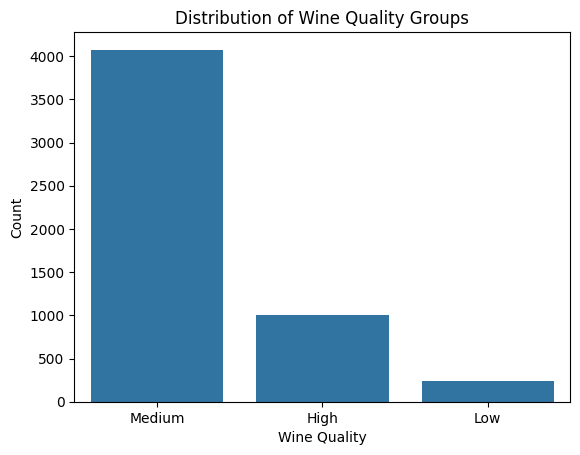

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_grouped)
plt.title("Distribution of Wine Quality Groups")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

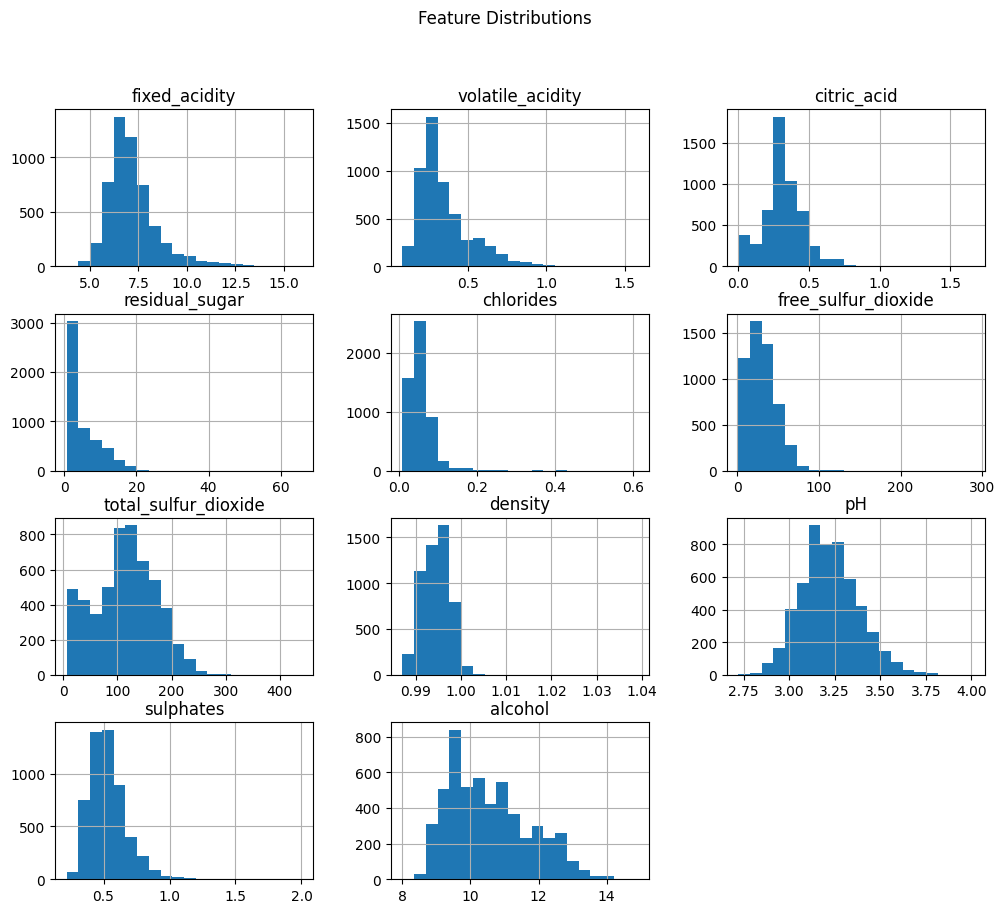

In [ ]:
X_clean.hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

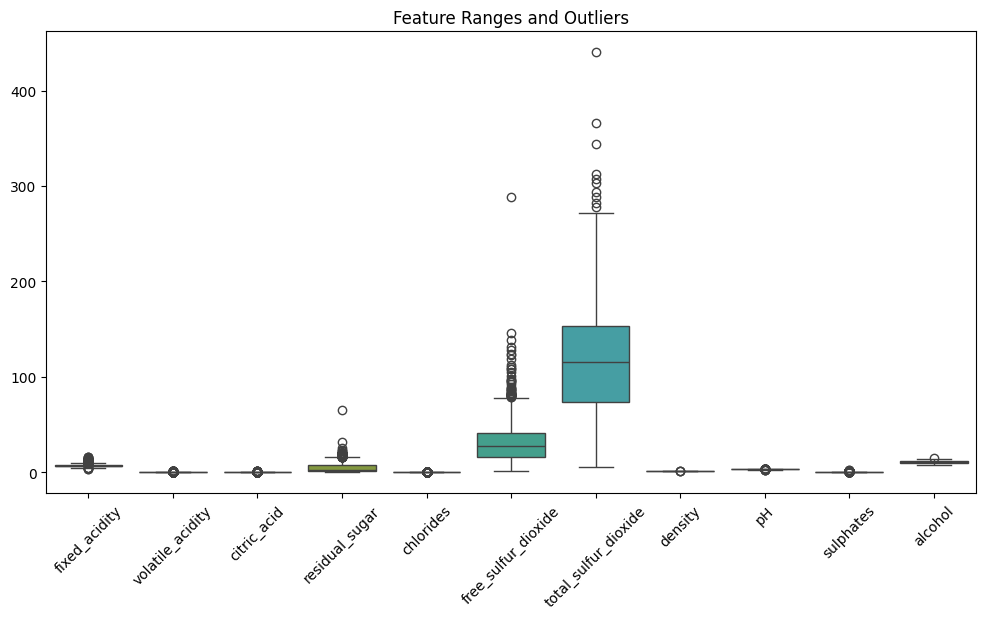

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X_clean)
plt.title("Feature Ranges and Outliers")
plt.xticks(rotation=45)
plt.show()

# Splitting of data

In [ ]:
from sklearn.model_selection import train_test_split
# Splitted the data into train,validation and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X_clean, y_grouped, test_size=0.3, random_state=42, stratify=y_grouped)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Train size: (3722, 11)
Validation size: (798, 11)
Test size: (798, 11)


# Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
#scaled the features using Standard Scalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Training the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
#Evaluation of knn
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7869674185463659
Classification Report:
               precision    recall  f1-score   support

        High       0.55      0.50      0.53       151
         Low       0.71      0.14      0.23        36
      Medium       0.84      0.90      0.87       611

    accuracy                           0.79       798
   macro avg       0.70      0.51      0.54       798
weighted avg       0.78      0.79      0.77       798

Confusion Matrix:
 [[ 76   0  75]
 [  0   5  31]
 [ 62   2 547]]


# Handling Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
#Handling the class imbalance using SMOTE
smote = SMOTE(random_state=42)

X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("After SMOTE:")
print(y_train_res.value_counts())

After SMOTE:
quality
High      2851
Medium    2851
Low       2851
Name: count, dtype: int64


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#traing the model using oversampled data
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(weights='distance')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#evaluation of knn
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6466165413533834
Classification Report:
               precision    recall  f1-score   support

        High       0.42      0.74      0.53       151
         Low       0.19      0.53      0.28        36
      Medium       0.89      0.63      0.74       611

    accuracy                           0.65       798
   macro avg       0.50      0.63      0.52       798
weighted avg       0.77      0.65      0.68       798

Confusion Matrix:
 [[112   8  31]
 [  2  19  15]
 [155  71 385]]


# Hyperparameters Tuning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import pandas as pd
#Finding the best paramters
k_values = [1, 3, 5]

results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train_res, y_train_res)

    y_pred = knn.predict(X_test_scaled)

    report = classification_report(y_test, y_pred, output_dict=True)

    f1_macro = report['macro avg']['f1-score']
    f1_weighted = report['weighted avg']['f1-score']

    results.append({
        'k': k,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'classification_report': report,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df[['k', 'f1_macro', 'f1_weighted']])

   k  f1_macro  f1_weighted
0  1  0.511175     0.730478
1  3  0.520003     0.701513
2  5  0.518626     0.679510


# Final Model Training

In [ ]:
#Final training on tuned parameters
knn_final = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_final.fit(X_train_res, y_train_res)

y_pred_final = knn_final.predict(X_test_scaled)

# Evaluation Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#Evaluation of final model
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("Classification Report:\n", classification_report(y_test, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))

Accuracy: 0.6741854636591479
Classification Report:
               precision    recall  f1-score   support

        High       0.43      0.72      0.54       151
         Low       0.19      0.39      0.25        36
      Medium       0.88      0.68      0.77       611

    accuracy                           0.67       798
   macro avg       0.50      0.60      0.52       798
weighted avg       0.77      0.67      0.70       798

Confusion Matrix:
 [[109   6  36]
 [  4  14  18]
 [142  54 415]]


# Feature importance

In [ ]:
from sklearn.inspection import permutation_importance
#Finding the features who has most influence on the final model
result = permutation_importance(knn_final, X_test_scaled, y_test, scoring='accuracy')

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                 Feature  Importance
10               alcohol    0.077444
5    free_sulfur_dioxide    0.059148
8                     pH    0.051629
1       volatile_acidity    0.048120
0          fixed_acidity    0.043860
7                density    0.040852
4              chlorides    0.037594
9              sulphates    0.034586
2            citric_acid    0.033333
3         residual_sugar    0.032331
6   total_sulfur_dioxide    0.024812


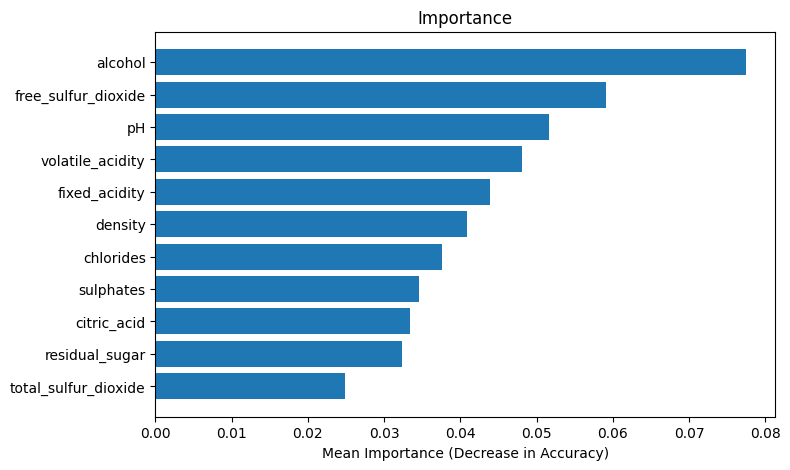

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(importance_df['Feature'], importance_df['Importance'],)
plt.gca().invert_yaxis()
plt.xlabel('Mean Importance (Decrease in Accuracy)')
plt.title('Importance')
plt.show()

# Model Interpretation

In [ ]:
import numpy as np
import pandas as pd
#Predicting the class of single test sample using final model
sample_index = 0
sample = X_test_scaled[sample_index].reshape(1, -1)

pred_class = knn_final.predict(sample)[0]
print("Predicted class:", pred_class)

Predicted class: High


In [ ]:
distances, indices = knn_final.kneighbors(sample, n_neighbors=5)
#Finding the nearest neighbors and their classes
print("Distances to neighbors:", distances)
print("Neighbor indices:", indices)

neighbor_classes = y_train_res.iloc[indices[0]]
print("Neighbor classes:", neighbor_classes.values)

Distances to neighbors: [[0.88459309 1.00715735 1.01321516 1.02771034 1.05838133]]
Neighbor indices: [[ 148 5450 5520 1115 4746]]
Neighbor classes: ['Medium' 'High' 'High' 'Medium' 'High']


In [ ]:
#printing the features of the nearest neigbors
neighbor_features = pd.DataFrame(X_train_res[indices[0]], columns=X_clean.columns)
neighbor_features['class'] = neighbor_classes.values
print(neighbor_features)

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       1.571405          0.263232     0.563526       -0.536238   0.408151   
1       2.178278          0.381426     0.426355       -0.551012   0.838647   
2       2.178278          0.358613     0.400120       -0.553838   0.827060   
3       1.798982          0.381967     0.358704       -0.602418   0.873384   
4       2.144398          0.474188     0.508640       -0.538209   0.908465   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -1.121492             -1.553346  1.278666  0.722931   1.421385   
1            -1.103583             -1.301526  1.090164 -0.122928   0.716558   
2            -1.132153             -1.341054  1.057935 -0.142736   0.720790   
3            -1.121492             -1.606249  1.098705  0.104354   0.165732   
4            -0.939265             -1.099580  1.254503 -0.035938   0.729847   

    alcohol   class  
0 -0.282924  Medium  
1 -0.282152 

In [ ]:
#Getting the indices of low class
y_test_pred = knn_final.predict(X_test_scaled)

low_indices = np.where(y_test_pred == 'Low')[0]
print("Indices of samples predicted as Low:", low_indices)

Indices of samples predicted as Low: [ 13  39  47  55  57  63  70  87 106 123 129 132 139 151 159 166 174 192
 199 204 206 208 210 217 227 238 260 267 301 307 318 399 405 409 419 420
 423 424 429 438 439 448 458 460 469 482 483 487 488 493 496 518 529 542
 544 545 554 558 563 564 568 571 605 607 624 629 645 661 668 680 694 707
 726 728]


In [ ]:
#Predicting the low class
sample_index = 13
sample = X_test_scaled[sample_index].reshape(1, -1)

pred_class = knn_final.predict(sample)[0]
print("Predicted class:", pred_class)

Predicted class: Low


In [ ]:
distances, indices = knn_final.kneighbors(sample, n_neighbors=5)
neighbor_classes = y_train_res.iloc[indices[0]]

print("Distances to neighbors:", distances)
print("Neighbor indices:", indices)
print("Neighbor classes:", neighbor_classes.values)

neighbor_features = pd.DataFrame(X_train_res[indices[0]], columns=X_clean.columns)
neighbor_features['class'] = neighbor_classes.values
print(neighbor_features)

Distances to neighbors: [[0.76007601 0.83294634 0.83298815 0.83680679 0.83744612]]
Neighbor indices: [[8292 6358 7231 7355 7924]]
Neighbor classes: ['Low' 'Low' 'Low' 'Low' 'Low']
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.425752          2.168474    -0.983180        0.133895  -0.177262   
1      -0.369173          2.221339    -0.901183        0.253181  -0.114858   
2      -0.370005          2.220199    -0.903056        0.251426  -0.115461   
3      -0.223225          2.162182    -0.824868        0.385651  -0.123411   
4      -0.220570          2.159065    -0.825465        0.386681  -0.124466   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -0.442335             -0.909492 -0.600195 -0.617415  -1.553136   
1            -0.264809             -0.827163 -0.511682 -0.646930  -1.627072   
2            -0.264426             -0.826438 -0.513017 -0.647099  -1.625984   
3            -0.359933             

# Visualization

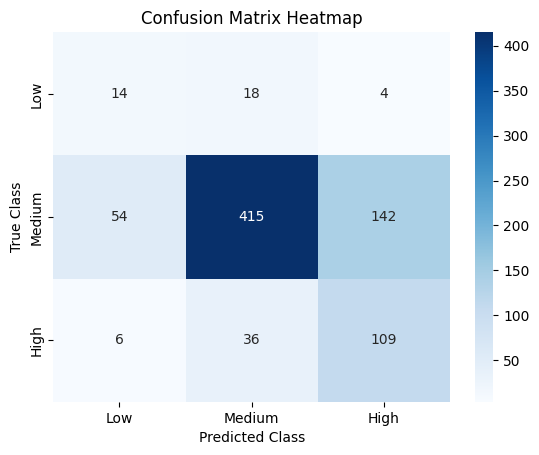

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_final, labels=['Low','Medium','High'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix Heatmap")
plt.show()

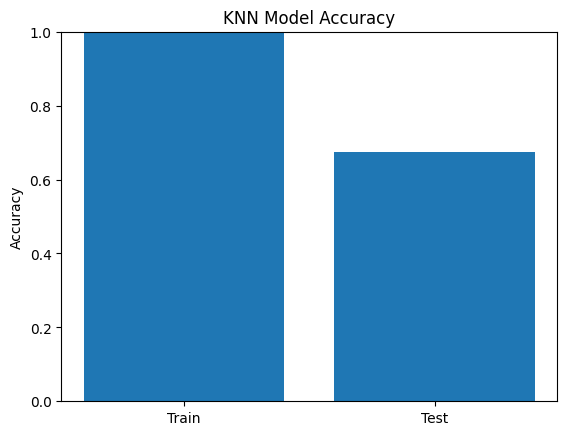

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

accuracies = [knn_final.score(X_train_scaled, y_train),
              knn_final.score(X_test_scaled, y_test)]
labels = ['Train', 'Test']

plt.bar(labels, accuracies)
plt.title("KNN Model Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()